# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from PPIAnalysis import *

# Import Data

In [6]:
# import data
conversion_df = pd.read_csv(r"C:\Users\noahb\OneDrive\Documents\PPI Graph Universe\GSE Table - GSE98793.top.table.csv",index_col=0)
STRING = pd.read_csv(r"C:\Users\noahb\OneDrive\Documents\PPI Graph Universe\string_interactions (3).tsv", delim_whitespace=True)

In [8]:
conversion_df.head()

,adj.P.Val,P.Value,t,B,Abs logFC,logFC,Gene.symbol,Gene.title
ID,,,,,,,,
212768_s_at,0.2654,0.000249,-3.732128,0.06389,1.030,-1.030,OLFM4,olfactomedin 4
206676_at,0.2874,0.000419,-3.589853,-0.33375,0.769,-0.769,CEACAM8,carcinoembryonic antigen related cell adhesion...
231688_at,0.0572,0.000007,-4.608674,2.78970,0.749,-0.749,MMP8,matrix metallopeptidase 8
212531_at,0.4234,0.001108,-3.311084,-1.07433,0.721,-0.721,LCN2,lipocalin 2
202018_s_at,0.4273,0.001600,-3.200823,-1.35284,0.695,-0.695,LTF,lactotransferrin


In [9]:
STRING.head()

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,ABCA13,HLA-DQA1,9606.ENSP00000411096,9606.ENSP00000339398,0.000,0,0.0,0.0,0.000,0.000,0.0,0.457,0.457
1,ABCG2,IGF1R,9606.ENSP00000237612,9606.ENSP00000268035,0.000,0,0.0,0.0,0.062,0.057,0.0,0.392,0.415
2,ABCG2,CYP1B1,9606.ENSP00000237612,9606.ENSP00000478561,0.000,0,0.0,0.0,0.000,0.056,0.0,0.414,0.423
3,ABCG2,FECH,9606.ENSP00000237612,9606.ENSP00000372326,0.042,0,0.0,0.0,0.064,0.000,0.0,0.446,0.460
4,ABCG2,VEGFA,9606.ENSP00000237612,9606.ENSP00000478570,0.000,0,0.0,0.0,0.000,0.000,0.0,0.509,0.509


# Implement Functions

In [10]:
# create graph
g = STRINGtoGraph(STRING)

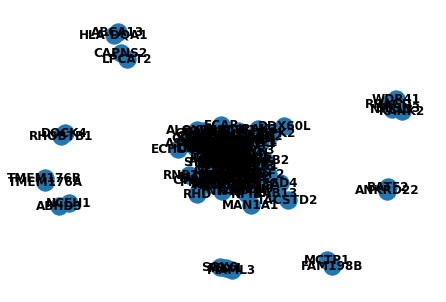

In [11]:
# draw graph
nx.draw(g, with_labels=True, font_weight='bold')

In [13]:
# import expression data
expression_df = pd.read_csv(r"Expression.csv", index_col=0)
# import patient data
sampInfo = pd.read_csv(r"SampleInfo.csv", index_col=0)

In [14]:
expression_df.head()

,GSM2612096,GSM2612097,GSM2612098,GSM2612099,GSM2612100,GSM2612101,GSM2612102,GSM2612103,GSM2612104,GSM2612105,...,GSM2612278,GSM2612279,GSM2612280,GSM2612281,GSM2612282,GSM2612283,GSM2612284,GSM2612285,GSM2612286,GSM2612287
1007_s_at,5.850755,5.577231,5.663056,5.596154,5.242699,5.212191,4.872792,5.272285,5.338772,5.070973,...,6.414110,6.115670,5.679880,6.740236,5.972264,5.808947,5.867953,5.938182,6.000403,5.772250
1053_at,7.092003,6.618856,6.487570,6.565388,6.531346,6.073299,6.414285,6.099957,6.969604,6.837721,...,7.798097,7.802633,7.345928,7.758726,7.580560,7.444604,7.238209,7.513523,7.737975,7.702891
117_at,9.373934,9.315652,8.237757,8.877479,8.148008,8.805715,8.859519,7.861680,9.129116,8.725871,...,9.967406,10.193932,9.737181,10.029855,9.960287,10.432011,10.155011,9.821582,9.522425,10.838637
121_at,5.814709,5.643282,5.363979,5.340978,5.701092,5.293687,5.379093,5.975036,5.661394,5.439686,...,5.572871,5.547584,5.748475,5.630231,5.858684,5.945134,5.631375,5.695992,5.706208,6.016455
1255_g_at,2.728267,2.671652,2.206741,2.998085,2.594565,2.340774,2.754393,2.607237,2.532411,3.130581,...,2.157327,2.264339,2.443638,2.302708,2.523345,2.454866,2.416422,2.298950,2.235815,2.475537


In [15]:
sampInfo.head()

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,age:ch1,anxiety:ch1,batch:ch1,gender:ch1,subject group:ch1,tissue:ch1
GSM2612096,whole_blood_control_1,GSM2612096,Public on May 12 2017,May 11 2017,Jan 23 2018,RNA,1,whole_blood_control,Homo sapiens,subject group: CNTL; healthy control,...,CB2 0SR,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2612...,54675,35.8,no,1,M,CNTL; healthy control,whole blood
GSM2612097,whole_blood_control_2,GSM2612097,Public on May 12 2017,May 11 2017,Jan 23 2018,RNA,1,whole_blood_control,Homo sapiens,subject group: CNTL; healthy control,...,CB2 0SR,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2612...,54675,36.9,no,1,F,CNTL; healthy control,whole blood
GSM2612098,whole_blood_control_3,GSM2612098,Public on May 12 2017,May 11 2017,Jan 23 2018,RNA,1,whole_blood_control,Homo sapiens,subject group: CNTL; healthy control,...,CB2 0SR,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2612...,54675,62.0,no,1,F,CNTL; healthy control,whole blood
GSM2612099,whole_blood_control_4,GSM2612099,Public on May 12 2017,May 11 2017,Jan 23 2018,RNA,1,whole_blood_control,Homo sapiens,subject group: CNTL; healthy control,...,CB2 0SR,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2612...,54675,35.7,no,1,F,CNTL; healthy control,whole blood
GSM2612100,whole_blood_control_5,GSM2612100,Public on May 12 2017,May 11 2017,Jan 23 2018,RNA,1,whole_blood_control,Homo sapiens,subject group: CNTL; healthy control,...,CB2 0SR,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2612...,54675,53.4,no,1,M,CNTL; healthy control,whole blood


In [16]:
# rename rows with gene names
conversionList = list(conversion_df.sort_values("ID").loc[:, "Gene.symbol"])
expressionSorted = expression_df.sort_index()
expressionSorted.index = (conversionList)
expressionSorted.head()

,GSM2612096,GSM2612097,GSM2612098,GSM2612099,GSM2612100,GSM2612101,GSM2612102,GSM2612103,GSM2612104,GSM2612105,...,GSM2612278,GSM2612279,GSM2612280,GSM2612281,GSM2612282,GSM2612283,GSM2612284,GSM2612285,GSM2612286,GSM2612287
MIR4640///DDR1,5.850755,5.577231,5.663056,5.596154,5.242699,5.212191,4.872792,5.272285,5.338772,5.070973,...,6.414110,6.115670,5.679880,6.740236,5.972264,5.808947,5.867953,5.938182,6.000403,5.772250
RFC2,7.092003,6.618856,6.487570,6.565388,6.531346,6.073299,6.414285,6.099957,6.969604,6.837721,...,7.798097,7.802633,7.345928,7.758726,7.580560,7.444604,7.238209,7.513523,7.737975,7.702891
HSPA6,9.373934,9.315652,8.237757,8.877479,8.148008,8.805715,8.859519,7.861680,9.129116,8.725871,...,9.967406,10.193932,9.737181,10.029855,9.960287,10.432011,10.155011,9.821582,9.522425,10.838637
PAX8,5.814709,5.643282,5.363979,5.340978,5.701092,5.293687,5.379093,5.975036,5.661394,5.439686,...,5.572871,5.547584,5.748475,5.630231,5.858684,5.945134,5.631375,5.695992,5.706208,6.016455
GUCA1A,2.728267,2.671652,2.206741,2.998085,2.594565,2.340774,2.754393,2.607237,2.532411,3.130581,...,2.157327,2.264339,2.443638,2.302708,2.523345,2.454866,2.416422,2.298950,2.235815,2.475537


In [17]:
# create the status df
classification_df = pd.DataFrame(index=list(sampInfo.index))
x, y = sampInfo.shape
status = []
for s in sampInfo.loc[:, 'characteristics_ch1']:
    if s == "subject group: CNTL; healthy control":
        status.append(0)
    else:
        status.append(1)
classification_df['status'] = status

In [19]:
classification_df.tail()

,status
GSM2612283,1
GSM2612284,0
GSM2612285,1
GSM2612286,0
GSM2612287,0


In [21]:
# impose the matrix
weightedGraph = SuperImposeCorrelation(g, expressionSorted, classification_df)

In [24]:
# calculate the centrality and return top 10
bet_genes, bet_values = TopBetweenness(weightedGraph)

In [25]:
print(bet_genes)
print(bet_values)

['MMP9', 'EGF', 'SERPINB2', 'ITGB5', 'THBS1', 'CLU', 'PTX3', 'SLC1A3', 'VEGFA', 'ORM1']
[0.4773440223074242, 0.4227953990937609, 0.3525618682467759, 0.2528755663994423, 0.2140989891948414, 0.18543046357615894, 0.17985360752875568, 0.16225165562913907, 0.1456953642384106, 0.12164517253398396]


In [28]:
# calculate the eigen centrality and return top 10
eig_genes, eig_values = TopEigen(weightedGraph)

In [29]:
print(eig_genes)
print(eig_values)

['LCN2', 'LTF', 'CAMP', 'DEFA4', 'S100A12', 'ELANE', 'MPO', 'PGLYRP1', 'PI3', 'SLPI']
[0.4103211648431004, 0.4029469530430381, 0.3628155743165243, 0.3497218190638944, 0.29143462855199836, 0.21567406479088005, 0.1964982922444138, 0.19449830401575469, 0.17530925314431028, 0.1747700139284951]
